$$
\begin{aligned}
  {\text{minimize}} \quad & \sum_{k=1}^K \sum_{t=0}^{T_k-1} \| {u_t^{(k)}} \|_2^2 + \sum_{k=1}^K \lambda_k \| w^{(k)} - x_{t_k}^{(k)} \|_2^2 \\
  \text{subject to} \quad & v_{t+1}^{(k)} = v_{t}^{(k)} + \Delta t x_t^{(k)} + 0.5 \Delta t^2 u_t^{(k)} \\
                    \quad & x_{t+1}^{(k)} = x_{t}^{(k)} + \Delta t u_t^{(k)} \\
                    \quad & v_{T_k}^{(k)} = v_\text{des}^{(k)} \\
                    \quad & x_{T_k}^{(k)} = x_\text{des}^{(k)} \\
                    \quad & \| x_t^{(k)} - x_t^{(l)} \|_2 \geq d_\text{safety} \quad \text{for all } l \ne k
\end{aligned}
$$

$$
\begin{aligned}
  {\text{minimize}} \quad & \sum_{k=1}^K \sum_{t=0}^{T_k-1} \| {u_t^{(k)}} \|_2^2 + \sum_{k=1}^K \lambda_k \| w^{(k)} - \bar{w}^{(k)} \|_2^2 \\
  \text{subject to} \quad & v_{t+1}^{(k)} = v_{t}^{(k)} + \Delta t x_t^{(k)} + 0.5 \Delta t^2 u_t^{(k)} \\
                    \quad & x_{t+1}^{(k)} = x_{t}^{(k)} + \Delta t u_t^{(k)} \\
                    \quad & v_{T_k}^{(k)} = v_\text{des}^{(k)} \\
                    \quad & x_{T_k}^{(k)} = x_\text{des}^{(k)} \\
                    \quad & \| x_t^{(k)} - x_t^{(l)} \|_2 \geq d_\text{safety} \quad \text{for all } l \ne k \\
                    \quad & x_{t_k}^{(k)} = \bar{w}^{(k)}
\end{aligned}
$$

$$
\begin{aligned}
  {\text{minimize}} \quad & \sum_{k=1}^K \sum_{t=0}^{T_k-1} \| {u_t^{(k)}} \|_2^2 + \sum_{k=1}^K \lambda_k \| w^{(k)} - \bar{w}^{(k)} \|_2^2 \\
  \text{subject to} \quad & v_{t+1}^{(k)} = v_{t}^{(k)} + \Delta t x_t^{(k)} + 0.5 \Delta t^2 u_t^{(k)} \\
                    \quad & x_{t+1}^{(k)} = x_{t}^{(k)} + \Delta t u_t^{(k)} \\
                    \quad & v_{T_k}^{(k)} = v_\text{des}^{(k)} \\
                    \quad & x_{T_k}^{(k)} = x_\text{des}^{(k)} \\
                    \quad & 2\left( \tilde{x}_t^{(k)} - \tilde{x}_t^{(l)} \right)^T \left( {x}_t^{(k)} - {x}_t^{(l)} \right) \geq d_\text{safety}^2+\| \tilde{x}_t^{(k)} - \tilde{x}_t^{(l)} \|_2^2  \quad \text{for all } l \ne k \\
                    \quad & x_{t_k}^{(k)} = \bar{w}^{(k)}
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

delt = 0.1
gamma = .05
lam = 10
d_safety = 20
n_iters = 10

####################################

scenario = 6

init, wpnt, dest, v = [], [], [], []

if scenario==1:
    init += [-30, 40]
    wpnt += [  0, 25]
    dest += [ 30, 40]
    v += [10]

    init += [-30,  0]
    wpnt += [  0, 15]
    dest += [ 30,  0]
    v += [10]

elif scenario==2:
    init += [  0, 40]
    wpnt += [ 25, 20]
    dest += [ 60,  0]
    v += [10]

    init += [ 60, 40]
    wpnt += [ 35, 20]
    dest += [  0,  0]
    v += [10]

elif scenario==3:
    init += [  0, 60]
    wpnt += [ -5, 25]
    dest += [-30,  0]
    v += [10]

    init += [-30,  0]
    wpnt += [  0, 15]
    dest += [ 30,  0]
    v += [10]

    init += [ 30,  0]
    wpnt += [  5, 25]
    dest += [  0, 60]
    v += [10]

elif scenario==4:
    init += [  0, 50]
    wpnt += [ 30, 35]
    dest += [ 60, 50]
    v += [10]

    init += [  0, 25]
    wpnt += [ 30, 25]
    dest += [ 60, 25]
    v += [10]

    init += [  0,  0]
    wpnt += [ 30, 15]
    dest += [ 60,  0]
    v += [10]
    
elif scenario==5:
    init += [  0, 50]
    wpnt += [ 30, 35]
    dest += [ 60, 50]
    v += [10]

    init += [  0, 25]
    wpnt += [ 30, 25]
    dest += [ 60, 30]
    v += [10]

elif scenario==6:
    init += [  0, 50]
    wpnt += [ 30, 35]
    dest += [ 70,  0]
    v += [10]

    init += [  0, 25]
    wpnt += [ 30, 30]
    dest += [ 60, 25]
    v += [10]

    init += [  0,  0]
    wpnt += [ 30, 15]
    dest += [ 60, 50]
    v += [10]
    
####################################

init = np.array(init)
wpnt = np.array(wpnt)
dest = np.array(dest)

init = init.reshape((-1,2)).T # initial position
wpnt = wpnt.reshape((-1,2)).T # original waypoint
dest = dest.reshape((-1,2)).T # desired destination
K = init.shape[1] # player number

veli = np.zeros((2,K))
velf = np.zeros((2,K))
tk = np.zeros((2,K))

for i in range(K):
    veli[:,i] = wpnt[:,i] - init[:,i] # initial velocity, origin to waypoint
    velf[:,i] = dest[:,i] - wpnt[:,i] # desired final velocity, waypoint to destination
    tk[0,i] = np.linalg.norm(veli[:,i])/v[i] # time at waypoint, t_k
    tk[1,i] = tk[0,i] + np.linalg.norm(velf[:,i])/v[i] # time at destination, T_k
    veli[:,i] *= v[i]/np.linalg.norm(veli[:,i])
    velf[:,i] *= v[i]/np.linalg.norm(velf[:,i])

nk = np.round(tk/delt).astype(int)
N = np.max(nk[1,:])
T = N*delt
ts = np.linspace(0,T,N+1) # timeseris

#print(nk)

#nk[0, 0] = 5;
#nk[0, 1] = 15;
#nk[0, 2] = 25;

#print(nk)

In [2]:
A = np.zeros((4,4))
B = np.zeros((4,2))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

x_cp_hist = [] # state history
u_cp_hist = [] # control history
w_cp_hist = [] # waypoint history
agent_wp_dist_hist = []
agent_dist_hist = []

x_orig_cp_hist = []
u_orig_cp_hist = []

In [3]:
import cvxpy as cp

x, u, w = [], [], []
for k in range(K):
    x.append(cp.Variable((4,N+1)))
    u.append(cp.Variable((2,N)))
    w.append(cp.Variable((2,1)))

obj = 0
constr = []
for k in range(K):
    obj += cp.sum_squares(u[k]) + lam*cp.sum_squares(w[k][:,0]-wpnt[:,k])
    constr += [ x[k][:,0]       == np.hstack((init[:,k],veli[:,k])) ] # initial condition
    constr += [ x[k][:,nk[1,k]] == np.hstack((dest[:,k],velf[:,k])) ] # desired final condition
    constr += [ x[k][:2,nk[0,k]]== w[k][:,0] ] # approaching to waypoint
    for t in range(N):
        constr += [ x[k][:,t+1] == A@x[k][:,t] + B@u[k][:,t] ] # dynamics
                    
cp.Problem(cp.Minimize(obj), constr).solve(solver=cp.ECOS,verbose=False)

x_cp = []
u_cp = []
w_cp = []
for k in range(K):
    x_cp.append(x[k].value)
    u_cp.append(u[k].value)
    w_cp.append(w[k].value)

agent_wp_dist = np.zeros((N+1,K))
agent_dist = np.zeros((N+1,K*(K-1)//2))
pair = np.zeros((2,K*(K-1)//2))
ind = 0
for k in range(K):
    agent_wp_dist[:,k] = np.linalg.norm(x_cp[k][:2,:]-w_cp[k],axis=0)
    for l in range(k+1,K):
        agent_dist[:,ind] = np.linalg.norm(x_cp[k][:2,:]-x_cp[l][:2,:],axis=0)
        pair[:,ind] = [k+1, l+1]
        ind += 1

x_cp_hist.append(x_cp)
u_cp_hist.append(u_cp)
w_cp_hist.append(w_cp)
agent_wp_dist_hist.append(agent_wp_dist)
agent_dist_hist.append(agent_dist)

In [4]:
for iter in range(n_iters):

    x0, u0 = [], []
    for k in range(K):
        x0.append(x_cp[k])
        u0.append(u_cp[k])

    obj = 0
    constr = []
    for k in range(K):
        obj += cp.sum_squares(u[k]) + lam*cp.sum_squares(w[k][:,0]-wpnt[:,k])
        constr += [ x[k][:,0]       == np.hstack((init[:,k],veli[:,k])) ]
        constr += [ x[k][:,nk[1,k]] == np.hstack((dest[:,k],velf[:,k])) ]
        constr += [ x[k][:2,nk[0,k]]== w[k][:,0] ]
        for t in range(N):
            constr += [ x[k][:,t+1] == A@x[k][:,t] + B@u[k][:,t] ]

    for k in range(K):
        for l in range(k+1,K):
            for t in range(N):
                diff = x0[k][:2,t]-x0[l][:2,t]
                constr += [ 2*diff.T@(x[k][:2,t]-x[l][:2,t]) >= d_safety**2 + diff.T@diff ]
        
    cp.Problem(cp.Minimize(obj), constr).solve(verbose=False)

    x_cp = []
    u_cp = []
    w_cp = []
    for k in range(K):
        x_cp.append(x[k].value)
        u_cp.append(u[k].value)
        w_cp.append(w[k].value)

    agent_wp_dist = np.zeros((N+1,K))
    agent_dist = np.zeros((N+1,K*(K-1)//2))
    ind = 0
    for k in range(K):
        agent_wp_dist[:,k] = np.linalg.norm(x_cp[k][:2,:]-w_cp[k],axis=0)
        for l in range(k+1,K):
            agent_dist[:,ind] = np.linalg.norm(x_cp[k][:2,:]-x_cp[l][:2,:],axis=0)
            ind += 1
    
    x_cp_hist.append(x_cp)
    u_cp_hist.append(u_cp)
    agent_wp_dist_hist.append(agent_wp_dist)
    agent_dist_hist.append(agent_dist)
    w_cp_hist.append(w_cp)

    print(iter)

0
1
2
3
4
5
6
7
8
9


In [5]:
x_orig, u_orig = [], []
for k in range(K):
    x_orig.append(cp.Variable((4,N+1)))
    u_orig.append(cp.Variable((2,N)))

obj = 0
constr = []
for k in range(K):
    obj += cp.sum_squares(u_orig[k]) + lam*cp.sum_squares(x_orig[k][:2,nk[0,k]]-wpnt[:,k])
    constr += [ x_orig[k][:,0]       == np.hstack((init[:,k],veli[:,k])) ]
    constr += [ x_orig[k][:,nk[1,k]] == np.hstack((dest[:,k],velf[:,k])) ]
    for t in range(N):
        constr += [ x_orig[k][:,t+1] == A@x_orig[k][:,t] + B@u_orig[k][:,t] ]
        #constr += [ cp.sum_squares(x[k][2:,t]) <= v_max**2 ]
                    
cp.Problem(cp.Minimize(obj), constr).solve(solver=cp.ECOS,verbose=False)

x_orig_cp = []
u_orig_cp = []
for k in range(K):
    x_orig_cp.append(x_orig[k].value)
    u_orig_cp.append(u_orig[k].value)
        
x_orig_cp_hist.append(x_orig_cp)
u_orig_cp_hist.append(u_orig_cp)

In [6]:
for iter in range(n_iters):

    x0_orig, u0_orig = [], []
    for k in range(K):
        x0_orig.append(x_orig_cp[k])
        u0_orig.append(u_orig_cp[k])

    obj = 0
    constr = []
    for k in range(K):
        obj += cp.sum_squares(u_orig[k]) + lam*cp.sum_squares(x_orig[k][:2,nk[0,k]]-wpnt[:,k])
        constr += [ x_orig[k][:,0]       == np.hstack((init[:,k],veli[:,k])) ]
        constr += [ x_orig[k][:,nk[1,k]] == np.hstack((dest[:,k],velf[:,k])) ]
        for t in range(N):
            constr += [ x_orig[k][:,t+1] == A@x_orig[k][:,t] + B@u_orig[k][:,t] ]
            #constr += [ cp.sum_squares(x[k][2:,t]) <= v_max**2 ]

    for k in range(K):
        for l in range(k+1,K):
            for t in range(N):
                diff = x0_orig[k][:2,t]-x0_orig[l][:2,t]
                constr += [ 2*diff.T@(x_orig[k][:2,t]-x_orig[l][:2,t]) >= (d_safety*min(1,2*(iter+1)/n_iters))**2 + diff.T@diff ]
        
    cp.Problem(cp.Minimize(obj), constr).solve(solver=cp.ECOS,verbose=False)

    x_orig_cp = []
    u_orig_cp = []
    for k in range(K):
        x_orig_cp.append(x_orig[k].value)
        u_orig_cp.append(u_orig[k].value)
        
    x_orig_cp_hist.append(x_cp)
    u_orig_cp_hist.append(u_cp)

    print(iter)

0
1
2
3
4
5
6
7
8
9


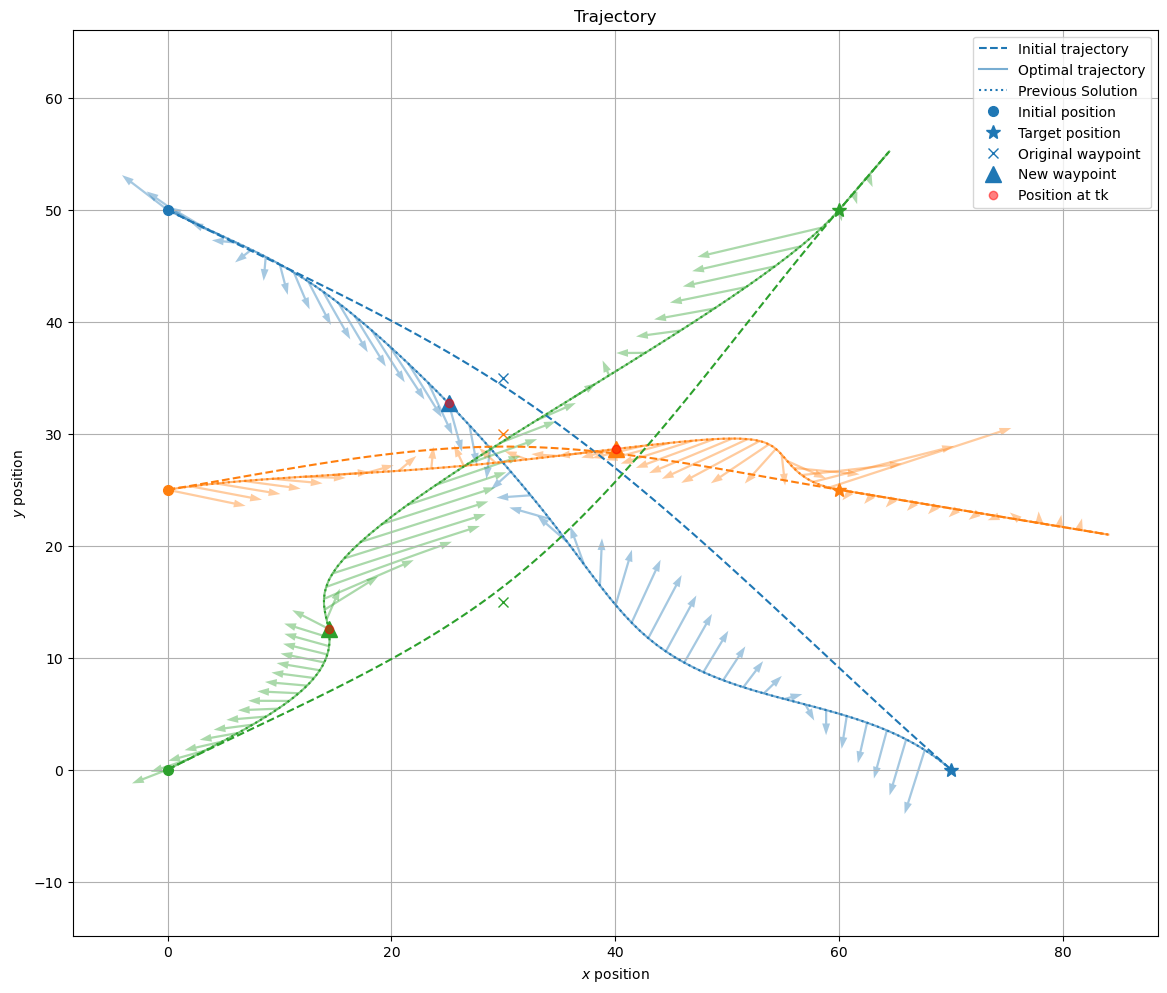

In [7]:
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

plt.figure(num=1, figsize=(14,12), dpi=100)
for k in range(K):
    plt.plot(x_cp_hist[0][k][0,:], x_cp_hist[0][k][1,:], '--', color=color[k], label='Initial trajectory')
    plt.plot(x_cp_hist[-1][k][0,:], x_cp_hist[-1][k][1,:], '-', color=color[k], alpha=0.6, label='Optimal trajectory')
    plt.plot(x_orig_cp_hist[-1][k][0,:], x_orig_cp_hist[-1][k][1,:], ':', color=color[k], label='Previous Solution')
    plt.plot(init[0,k], init[1,k], 'o', markersize=7, color=color[k], label='Initial position')
    plt.plot(dest[0,k], dest[1,k], '*', markersize=10, color=color[k], label='Target position')
    plt.plot(wpnt[0,k], wpnt[1,k], 'x', markersize=7, color=color[k], label='Original waypoint')
    plt.plot(w_cp_hist[-1][k][0,0], w_cp_hist[-1][k][1,0], '^', markersize=12, color=color[k], label='New waypoint')
    plt.plot(x_cp_hist[-1][k][0,nk[0,k]], x_cp_hist[-1][k][1,nk[0,k]], 'ro', alpha=0.5, label='Position at tk')
    if k==0:
        plt.legend()
plt.title('Trajectory')

#for i in range(len(x_cp_hist)):
#    for k in range(K):
#        plt.plot(x_cp_hist[i][k][0,:], x_cp_hist[i][k][1,:], alpha=i/len(dist_hist)*0.8+0.2, linestyle='dashed')

for k in range(K):
    for t in range(0,N-1,2):
        plt.arrow(x_cp_hist[-1][k][0,t], x_cp_hist[-1][k][1,t], 1*u_cp_hist[-1][k][0,t], 1*u_cp_hist[-1][k][1,t], \
                  head_width=0.7, width=0.2, color=color[k], alpha=0.4, ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()

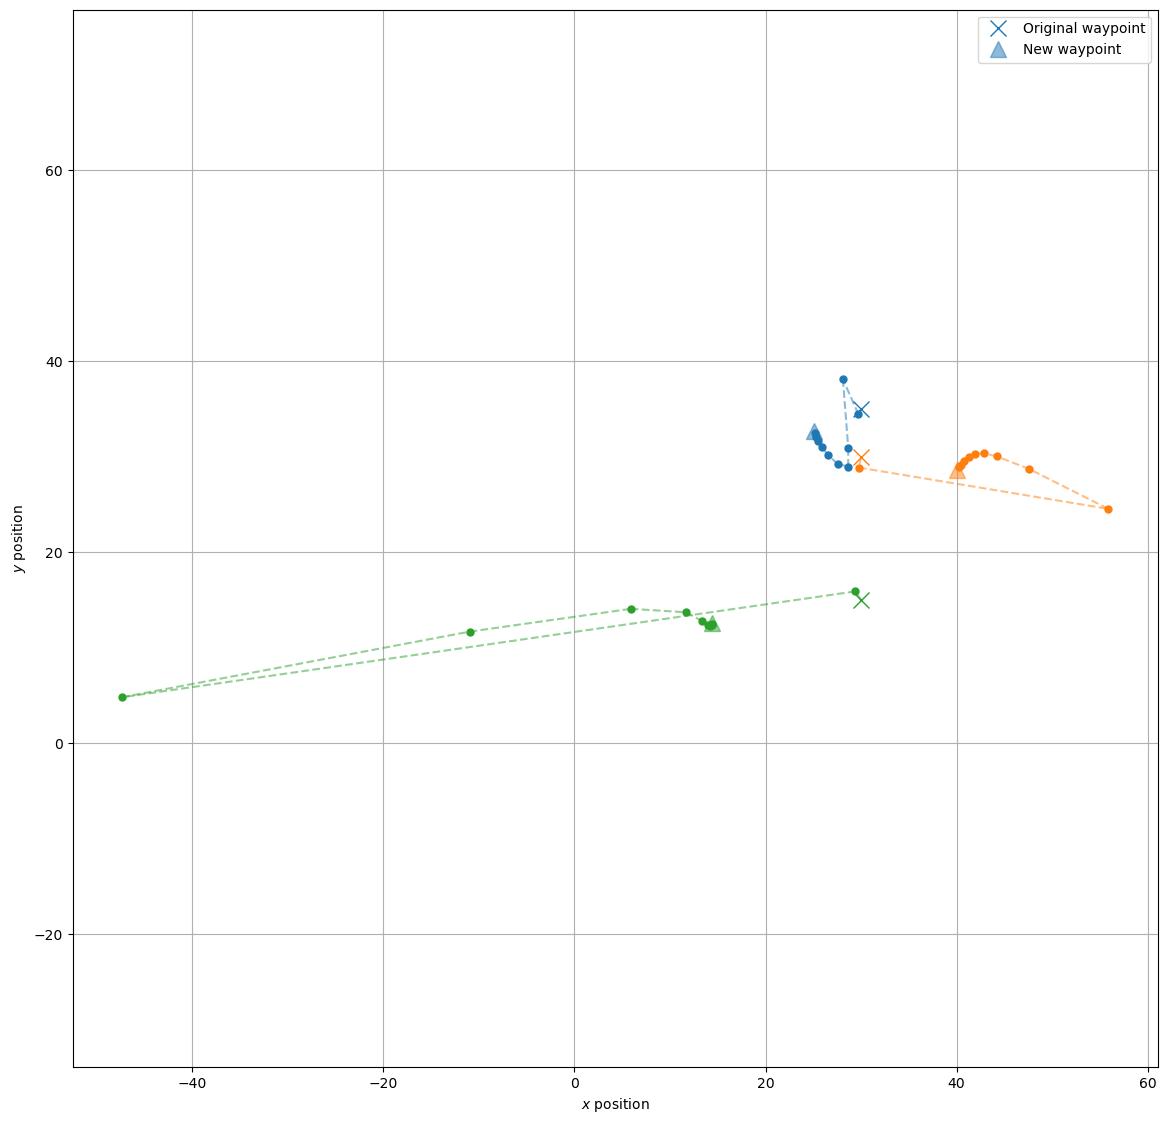

In [8]:
plt.figure(figsize=(14,14), dpi=100)
for k in range(K):
    plt.plot(wpnt[0,k], wpnt[1,k], 'x', markersize=12, color=color[k], label='Original waypoint')
    plt.plot(w_cp_hist[-1][k][0,0], w_cp_hist[-1][k][1,0], '^', alpha=0.5, markersize=12, color=color[k], label='New waypoint')
    plt.plot([  wpnt[0,k], w_cp_hist[0][k][0,0]  ],\
             [  wpnt[1,k], w_cp_hist[0][k][1,0]  ], '--', alpha=0.5, color=color[k])
    for i in range(n_iters):
        plt.plot(w_cp_hist[i][k][0,0], w_cp_hist[i][k][1,0], 'o', markersize=5, color=color[k])
        plt.plot([  w_cp_hist[i][k][0,0], w_cp_hist[i+1][k][0,0]  ],\
                 [  w_cp_hist[i][k][1,0], w_cp_hist[i+1][k][1,0]  ], '--', alpha=0.5, color=color[k])
    if k==0:
        plt.legend()
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()

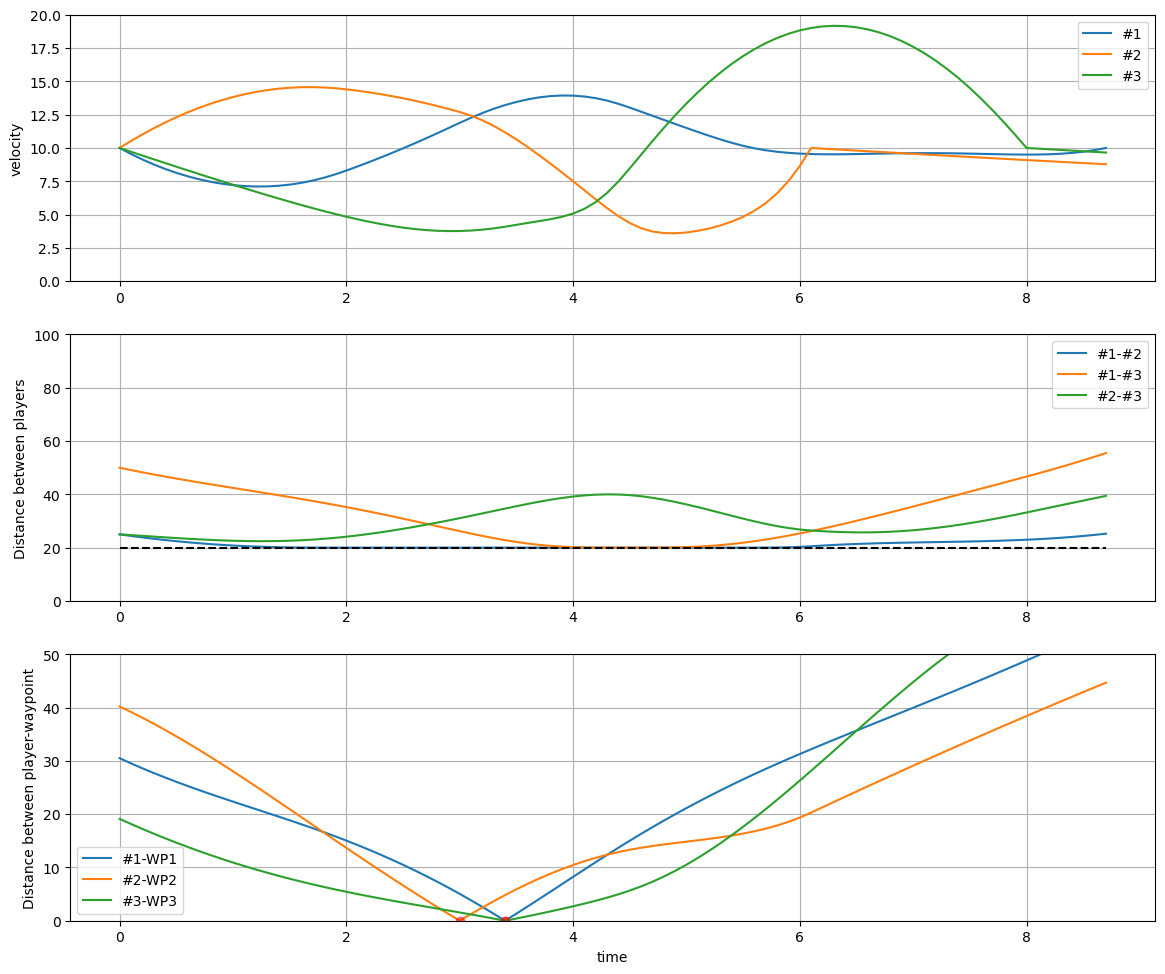

In [9]:
plt.figure(figsize=(14,12), dpi=100)
plt.subplot(311)
for k in range(K):
    plt.plot(ts, np.linalg.norm(x_cp_hist[-1][k][2:,:],axis=0), label='#'+str(k+1))
plt.ylabel('velocity')
plt.ylim(0,20)
plt.grid()
plt.legend()
plt.subplot(312)
for i in range(K*(K-1)//2):
    plt.plot(ts, agent_dist_hist[-1][:,i], label='#'+str(int(pair[0, i]))+'-#'+str(int(pair[1, i])))
plt.plot(ts, d_safety*np.ones((len(ts),1)), 'k--')
plt.ylim(0,100)
plt.ylabel('Distance between players')
plt.grid()
plt.legend()
plt.subplot(313)
for k in range(K):
    plt.plot(ts, agent_wp_dist_hist[-1][:,k], label='#'+str(k+1)+'-WP'+str(k+1))
    plt.plot(nk[0,k]*delt, agent_wp_dist_hist[-1][nk[0,k],k], 'ro', alpha=0.5)
plt.ylim(0,50)
plt.xlabel('time')
plt.ylabel('Distance between player-waypoint')
plt.grid()
plt.legend()
plt.show()

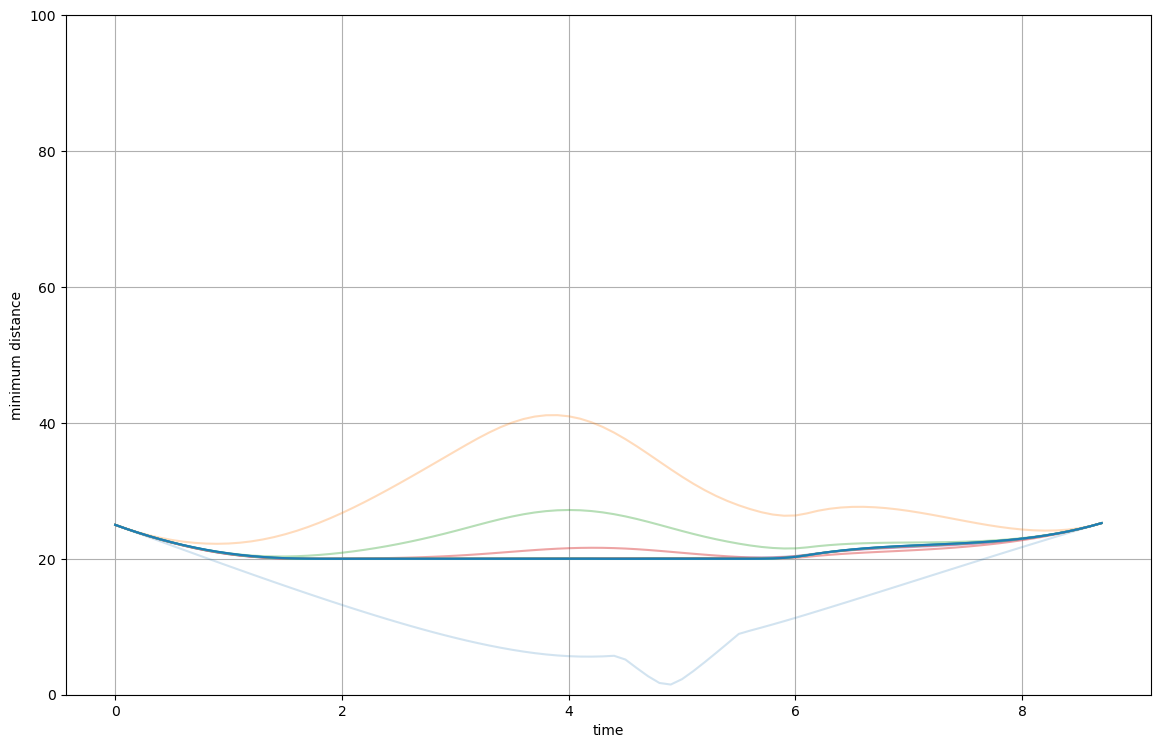

In [10]:
plt.figure(figsize=(14,9), dpi=100)
for i in range(len(agent_dist_hist)):
    plt.plot(ts, np.min(agent_dist_hist[i], axis=1), alpha=i/len(agent_dist_hist)*0.8+0.2)
plt.ylim(0,100)
plt.xlabel('time')
plt.ylabel('minimum distance')
plt.grid()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


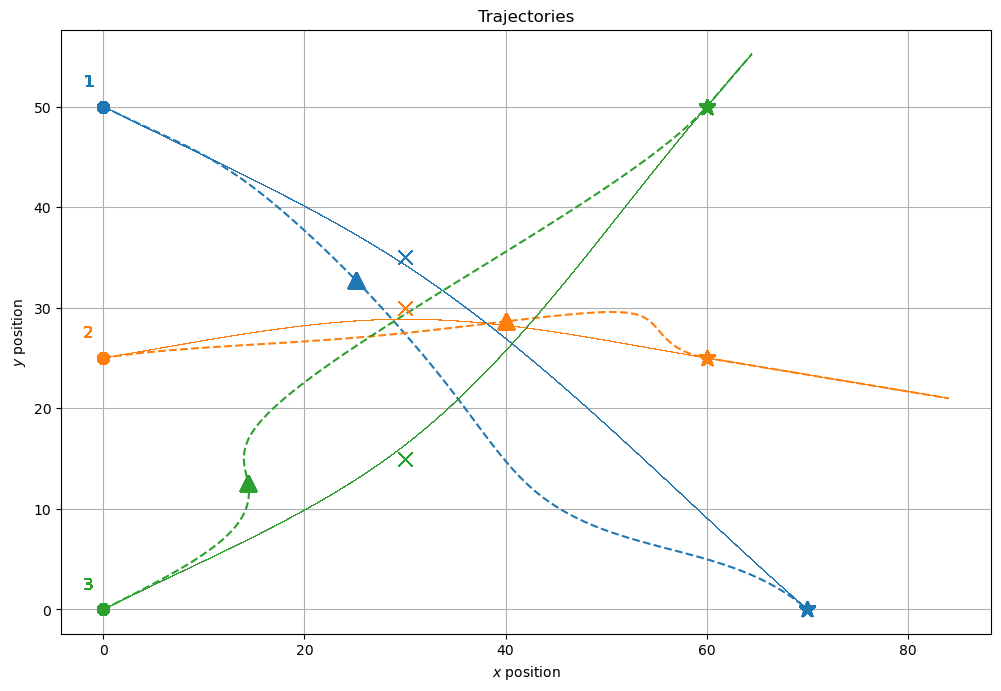

In [11]:

#matplotlib notebook

import matplotlib.animation as animation
 
def updateline(num, data1, line1, data2, line2, data3, line3):

    for k in range(K):
        plt.plot(x_cp_hist[0][k][0,:], x_cp_hist[0][k][1,:], \
                 label='Minimum energy trajectory', color=plt.cm.tab20(2*k), linewidth=0.1)
        plt.plot(init[0,k], init[1,k], 'o', markersize=8, label='Initial position', color=plt.cm.tab20(2*k))
        plt.plot(wpnt[0,k], wpnt[1,k], 'x', markersize=10, label='Waypoint', color=plt.cm.tab20(2*k))
        plt.plot(w_cp_hist[-1][k][0,0], w_cp_hist[-1][k][1,0], '^', markersize=12, label='New waypoint', color=plt.cm.tab20(2*k))
        plt.plot(dest[0,k], dest[1,k], '*', markersize=12, label='Destination', color=plt.cm.tab20(2*k))
        plt.text(init[0,k]-2, init[1,k]+2, f'{k+1}', size=12, color=plt.cm.tab20(2*k))

    line1.set_data(data1[..., :num])
    line2.set_data(data2[..., :num])  
    line3.set_data(data3[..., :num])  
    return line1, line2, line3
 
data1 = np.array([x_cp_hist[-1][0][0,:], x_cp_hist[-1][0][1,:]]) 
data2 = np.array([x_cp_hist[-1][1][0,:], x_cp_hist[-1][1][1,:]])
if K==3:
    data3 = np.array([x_cp_hist[-1][2][0,:], x_cp_hist[-1][2][1,:]])
else:
    data3 = np.array([x_cp_hist[-1][-1][0,:], x_cp_hist[-1][-1][1,:]])*0
          
fig = plt.figure(num=1, figsize=(12,8), dpi=100)
ax1 = fig.add_subplot(111)
l = ax1.plot([], [], color=plt.cm.tab20(2*0), linestyle='dashed', label='1')[0]
k = ax1.plot([], [], color=plt.cm.tab20(2*1), linestyle='dashed', label='2')[0]
j = ax1.plot([], [], color=plt.cm.tab20(2*2), linestyle='dashed', label='3')[0]

#ax1.legend([l, k, j], [l.get_label(), k.get_label(), j.get_label()], loc=0)

plt.title('Trajectories')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.axis('equal')

line_animation = animation.FuncAnimation(fig, updateline, frames=N+10, fargs=(data1, l, data2, k, data3, j))
line_animation.save(f'scenario{scenario}.gif', writer='imagemagick')
plt.show()


In [12]:
import pyglet

# pick an animated gif file you have in the working directory
ag_file = 'scenario6.gif'
animation = pyglet.resource.animation(ag_file)
sprite = pyglet.sprite.Sprite(animation)

# create a window and set it to the image size
win = pyglet.window.Window(width=sprite.width, height=sprite.height)

# set window background color = r, g, b, alpha
# each value goes from 0.0 to 1.0
green = 0, 1, 0, 1
pyglet.gl.glClearColor(*green)

@win.event
def on_draw():
    win.clear()
    sprite.draw()

pyglet.app.run()

C:\Users\Gyubin Park\AppData\Roaming\Python\Python39\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] 스레드 모드가 설정된 후에는 바꿀 수 없습니다
  warnings.warn(str(err))
